In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

In [3]:
task = mnist.MNIST()
task.load_all_data(device)

In [4]:
from functools import partial

In [5]:
a = models_breed.UniformBreeder
b = partial(models_breed.UniformBreeder, breeder_swap_prob=.1)


In [6]:
b().p

0.1

In [7]:
from functools import partial

-795.87294921875 -0.6847704988718033 -795.87294921875


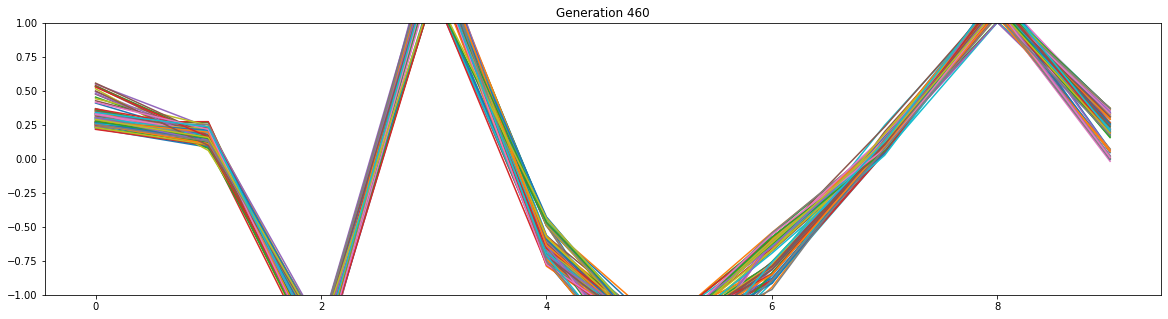

KeyboardInterrupt: 

In [115]:

def calc_ipop():
    return util.to_np_obj_array([torch.randn(1000) for _ in range(100)])
def calc_clone(xs):
    return util.to_np_obj_array([x for x in xs])
def calc_crossover(xs1, xs2):
    return util.to_np_obj_array([util.uniform_crossover(a, b) for a,b in zip(xs1, xs2)])
def calc_mutate(xs):
    return util.to_np_obj_array([util.additive_noise(x, eps=1e-2) for x in xs])

# calc_npop = partial(ga.calc_npop_tournament, 
#                     k_elite=0, k_tournament=5, do_crossover=True)

# calc_npop = partial(ga.calc_npop_roulette, 
#                     k_elite=0, do_crossover=True,
#                     fit2prob_fn=partial(ga.fit2prob_sm, temperature=1., normalize=True))

# calc_npop = partial(ga.calc_npop_roulette, 
#                     k_elite=0, do_crossover=True,
#                     fit2prob_fn=partial(ga.fit2prob_top_K, top_k=30))

calc_npop = partial(ga.calc_npop_diversity, do_crossover=True,
                    fit2prob_fn=partial(ga.fit2prob_sm, temperature=1., normalize=True))

torch.manual_seed(0)
np.random.seed(0)
test = ga.SimpleGA(calc_ipop_fn=calc_ipop, calc_npop_fn=calc_npop,
                   calc_clone_fn=calc_clone, calc_mutate_fn=calc_mutate,
                   calc_crossover_fn=calc_crossover)


import time
def callback(ev):
    pop = ev.pop
    if ev.gen_idx%20==0:
        plt.figure(figsize=(20,5))
        for geno in pop:
            plt.plot(geno.numpy()[20:30])
        clear_output(wait=True)
        quality = ev.fitdata_DA['quality'].mean()
        diversity = ev.fitdata_DA['diversity'].mean()
        fitness = ev.fitdata_DA['fitness'].mean()
        print(quality, diversity, fitness)
        plt.title(f'Generation {ev.gen_idx}')
        plt.ylim(-1,1)
        plt.show()
        time.sleep(.5)
    
def calc_fitness(xs):
    sim = util.calc_pairwise_cossim(torch.stack(list(xs))).numpy()
    quality = np.array([-x.pow(2.).sum().item() for x in xs])
    diversity = -sim.mean(axis=-1)
    codiversity = -sim
    coquality = (quality[:, None] + quality)/2.
    cofitness = 0*coquality+1*codiversity
    fitness = quality
    fitdata = {'quality': quality, 'diversity': diversity, 'fitness': fitness}
    return cofitness, util.dict_arr2arr_dict(fitdata)

test.run_evolution(1000, calc_fitness, tqdm, fn_callback=callback)
    

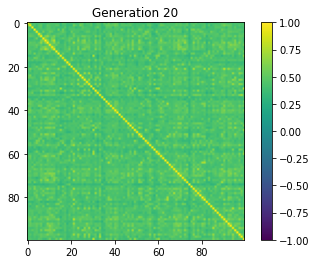

In [193]:
gen_idx = 20
popi = torch.stack(list(pop[gen_idx]))
cos = util.calc_pairwise_cossim(popi)
plt.imshow(cos, vmin=-1, vmax=1)
plt.colorbar()
plt.title(f"Generation {gen_idx}")
plt.show()

In [9]:
from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print("Hello World!")

Hello World!


In [50]:
sim = util.calc_pairwise_cossim(torch.stack(list(test.pop)))

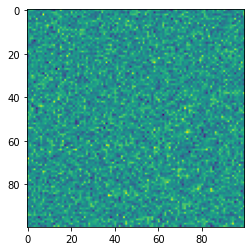

In [58]:
fitness = np.random.randn(100)
sim = np.random.randn(100, 100)
cofitness = (fitness[:, None] + fitness[None, :]).mean()
plt.imshow(sim+cofitness)

In [73]:
copop = Population(pop=list(range(100))).get_co_pop()
copop = copop.flatten()
p = np.random.randn(100, 100)
p = torch.from_numpy(p).flatten().softmax(dim=-1).numpy()

np.random.choice(copop, size=100, replace=False, p=p)

array([(86, 51), (87, 84), (25, 29), (24, 83), (88, 39), (23, 48),
       (58, 53), (38, 78), (49, 91), (23, 4), (23, 66), (9, 25), (78, 71),
       (46, 74), (77, 95), (33, 53), (97, 68), (63, 47), (63, 21),
       (86, 59), (10, 4), (28, 68), (47, 73), (1, 27), (87, 89), (92, 41),
       (34, 51), (3, 71), (54, 13), (23, 81), (21, 53), (34, 13),
       (95, 18), (23, 47), (61, 6), (54, 19), (93, 53), (30, 78), (2, 81),
       (63, 85), (79, 75), (79, 29), (68, 40), (45, 94), (75, 92),
       (29, 65), (23, 71), (9, 35), (67, 94), (14, 78), (2, 57), (91, 2),
       (40, 42), (54, 86), (18, 62), (11, 2), (99, 42), (77, 52),
       (39, 41), (75, 5), (46, 91), (30, 34), (22, 21), (14, 26),
       (12, 50), (64, 71), (16, 97), (80, 85), (61, 50), (37, 95),
       (58, 14), (81, 18), (16, 83), (15, 37), (93, 87), (86, 44),
       (70, 92), (57, 59), (44, 22), (91, 28), (36, 95), (59, 38),
       (15, 77), (91, 19), (57, 8), (51, 61), (55, 64), (66, 18),
       (87, 60), (35, 41), (91, 88)

There are $N$ individuals ranked as $x_0, x_1, ..., x_{N-1}$

If we run a tournament of size $K$, 
the probability $x_0$

In [131]:
a = torch.randn(10000)
b = torch.randn(10000)
c = util.uniform_crossover(a, b)
d = util.uniform_crossover(a, b)

print(torch.cosine_similarity(a, b, dim=-1))
print(torch.cosine_similarity(c, a, dim=-1))
print(torch.cosine_similarity(c, b, dim=-1))
print(torch.cosine_similarity(d, a, dim=-1))
print(torch.cosine_similarity(d, b, dim=-1))
print(torch.cosine_similarity(c, d, dim=-1))

tensor(-0.0002)
tensor(0.5025)
tensor(0.5041)
tensor(0.4943)
tensor(0.4993)
tensor(0.4892)


/home/akarshkumar0101/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  del sys.path[0]
/home/akarshkumar0101/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


0.010041686


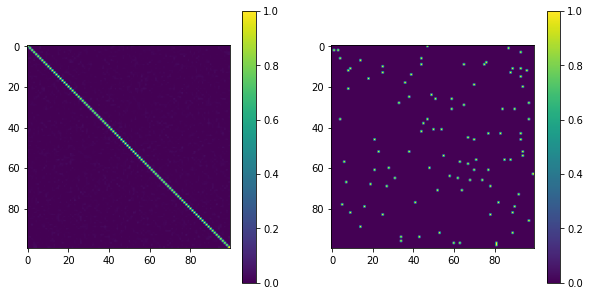

0.019189414


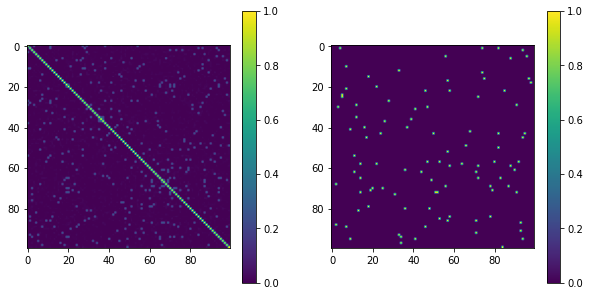

0.030983152


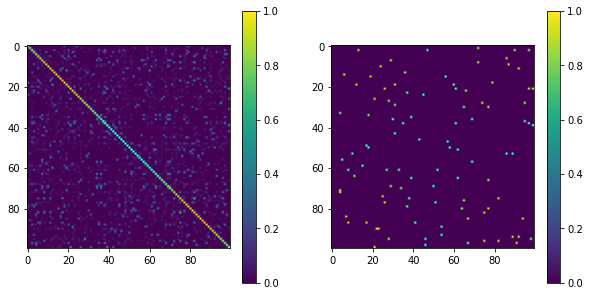

0.04151485


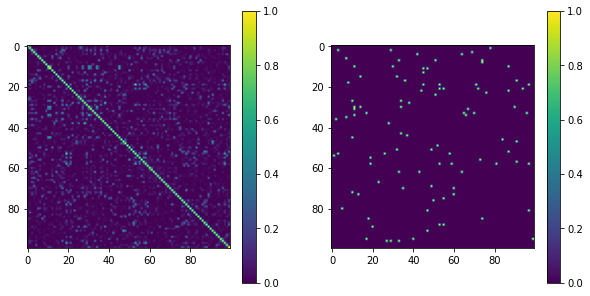

0.06789137


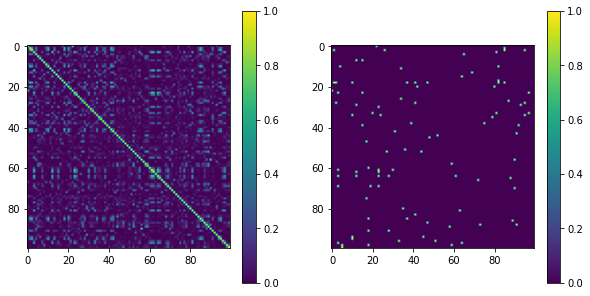

0.1284213


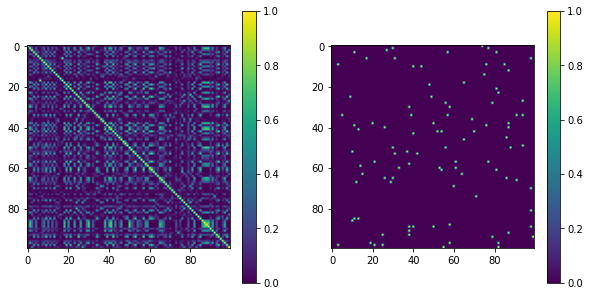

0.20825452


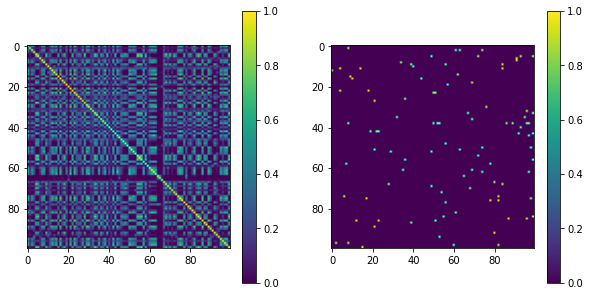

0.26868546


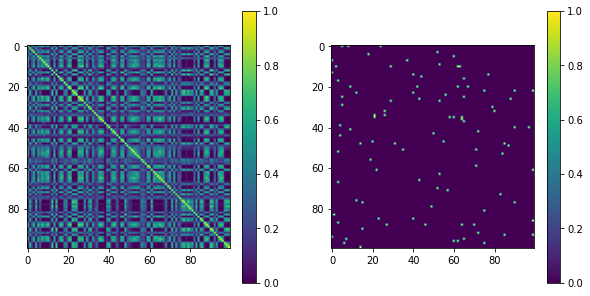

0.31231007


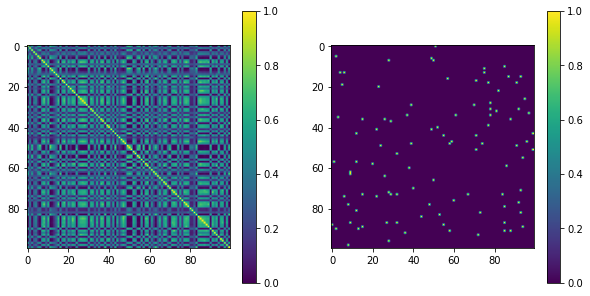

0.34572643


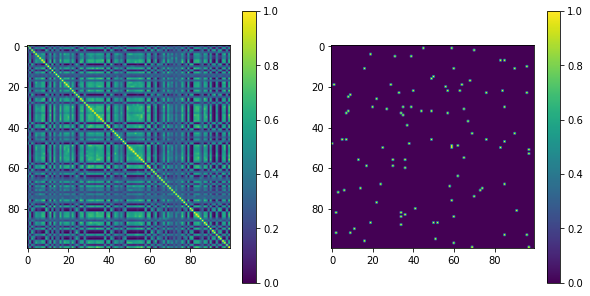

0.43156993


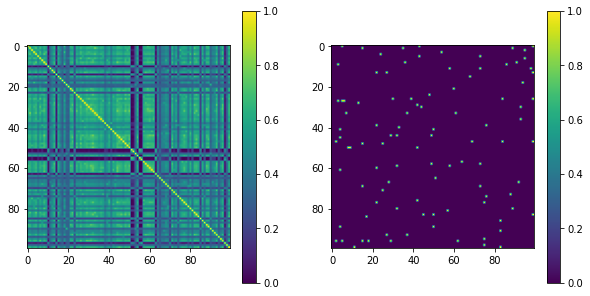

0.56875706


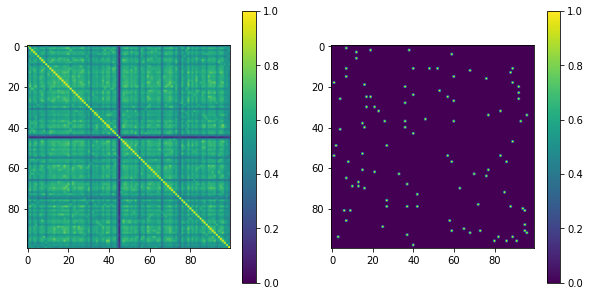

0.6264279


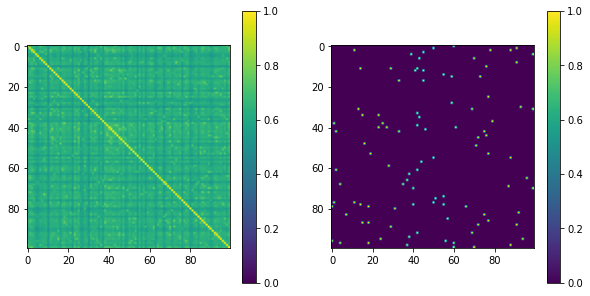

0.65047884


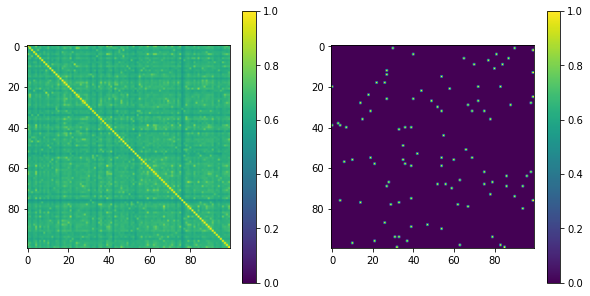

0.66692


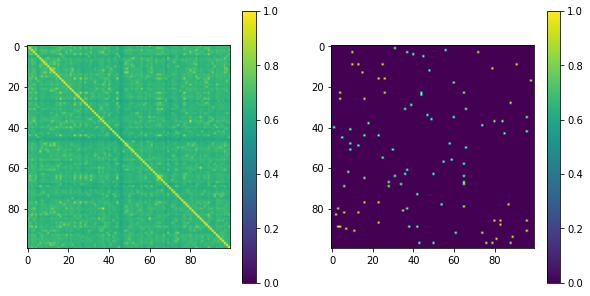

0.68253857


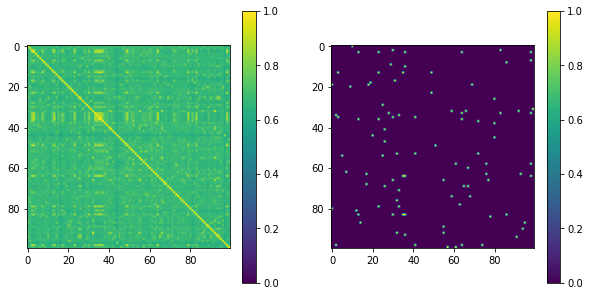

0.71431


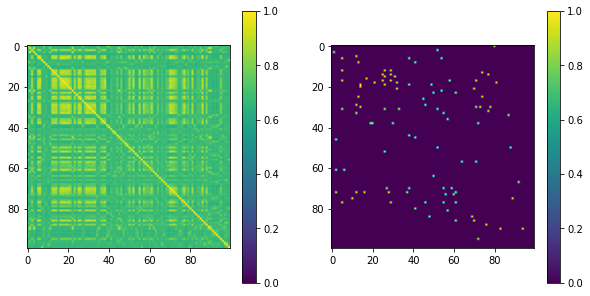

0.80011135


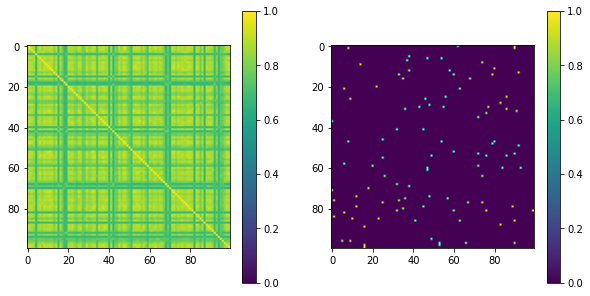

0.8537368


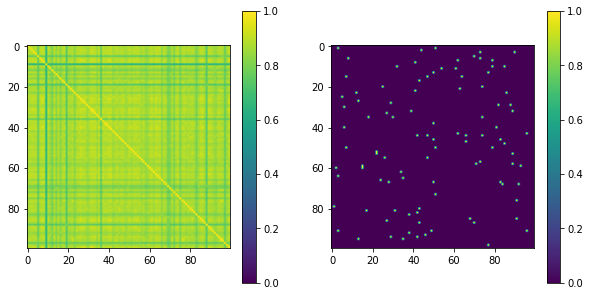

0.87433493


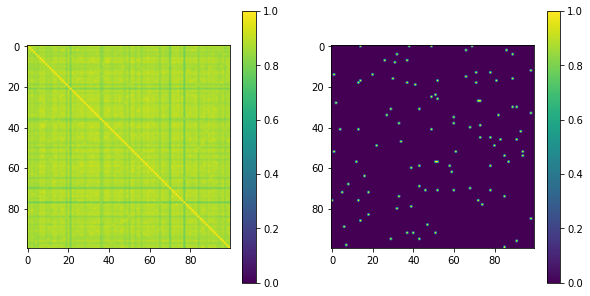

In [142]:
torch.manual_seed(0)
np.random.seed(0)
pop = torch.randn(100, 10000)

for gen_idx in tqdm(range(20)):
    cosim = util.calc_pairwise_cossim(pop).numpy()
    cosim = cosim.flatten()
    
    co_pop = []
    for p in pop:
        for p2 in pop:
            co_pop.append((p, p2))
    co_pop = np.array(co_pop)
    
    p = ga.fit2prob_sm(cosim, temperature=1., normalize=True).reshape(100, 100)
    p[np.arange(100), np.arange(100)]= 0.
    p=p/p.sum()
    p = p.flatten()
    
    idx_pairs = np.random.choice(np.arange(len(co_pop)), size=100, replace=False, p=p)
    pairs = co_pop[idx_pairs]
    
    
    npop = []
    for pair in pairs:
        npop.append(util.uniform_crossover(*pair))
    
    pop = torch.stack(npop)
    
    
    child_pic = np.zeros((100, 100)).flatten()
    child_pic[idx_pairs] = 1.
    child_pic = child_pic.reshape(100, 100)
    
    print(cosim.mean())
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.imshow(cosim.reshape(100, 100), vmin=0, vmax=1)
    plt.colorbar()
    plt.subplot(122)
    plt.imshow(child_pic, vmin=0, vmax=1)
    plt.colorbar()
    plt.show()
    
